<a href="https://colab.research.google.com/github/tanmay023/GREEN-SKILL-AND-AI/blob/main/DOGS_VS_CATS_90_50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanmayshambharkar123","key":"22532b995bdf14d28889fed4a01a3e33"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d chetankv/dogs-cats-images

Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
 81% 350M/435M [00:02<00:01, 76.5MB/s]
100% 435M/435M [00:02<00:00, 162MB/s] 


In [ ]:
!unzip dogs-cats-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/dogs/dog.2008.jpg  
  inflating: dataset/training_set/dogs/dog.2009.jpg  
  inflating: dataset/training_set/dogs/dog.201.jpg  
  inflating: dataset/training_set/dogs/dog.2010.jpg  
  inflating: dataset/training_set/dogs/dog.2011.jpg  
  inflating: dataset/training_set/dogs/dog.2012.jpg  
  inflating: dataset/training_set/dogs/dog.2013.jpg  
  inflating: dataset/training_set/dogs/dog.2014.jpg  
  inflating: dataset/training_set/dogs/dog.2015.jpg  
  inflating: dataset/training_set/dogs/dog.2016.jpg  
  inflating: dataset/training_set/dogs/dog.2017.jpg  
  inflating: dataset/training_set/dogs/dog.2018.jpg  
  inflating: dataset/training_set/dogs/dog.2019.jpg  
  inflating: dataset/training_set/dogs/dog.202.jpg  
  inflating: dataset/training_set/dogs/dog.2020.jpg  
  inflating: dataset/training_set/dogs/dog.2021.jpg  
  inflating: dataset/training_set/dogs/dog.2022.jpg  
  inflating: dataset/training_set

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16


In [11]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
conv_base.trainable = False

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [23]:
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
    '/content/dog vs cat/dataset/training_set',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/dog vs cat/dataset/test_set',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 292ms/step - accuracy: 0.7869 - loss: 0.5282 - val_accuracy: 0.8915 - val_loss: 0.2664
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 259ms/step - accuracy: 0.8925 - loss: 0.2461 - val_accuracy: 0.8835 - val_loss: 0.2590
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 260ms/step - accuracy: 0.9012 - loss: 0.2333 - val_accuracy: 0.9030 - val_loss: 0.2241
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 272ms/step - accuracy: 0.9119 - loss: 0.2096 - val_accuracy: 0.8910 - val_loss: 0.2545
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.9192 - loss: 0.1940 - val_accuracy: 0.8965 - val_loss: 0.2355
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 70s 278ms/step - accuracy: 0.9188 - loss: 0.2038 - val_accuracy: 0.9040 - val_loss: 0.2281
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 258ms/step - accuracy: 0.9278 - loss: 0.1704 - val_accuracy: 0.9110 - val_loss: 0.2323
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 256ms/step - accuracy: 0.9271 - loss: 0

In [31]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9027 - loss: 0.2745
Test Loss: 0.2561
Test Accuracy: 90.50%


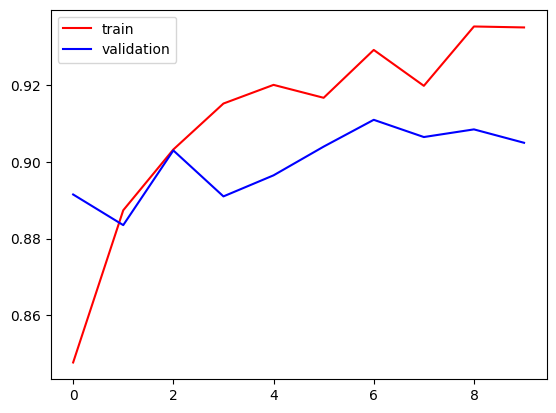

In [32]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

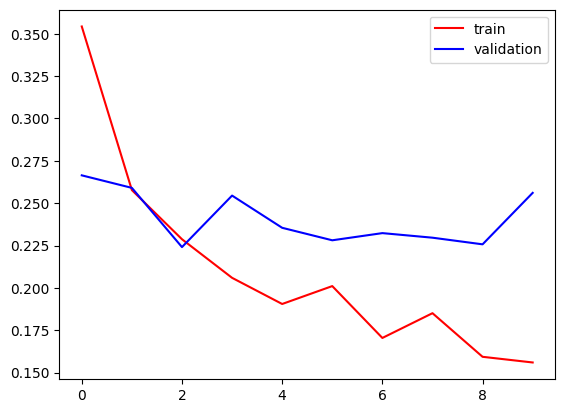

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
model.save('DOGS_VS_CATS_90.50%.h5')

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('/content/DOGS_VS_CATS_90.50%.h5')
img_path = '/content/pug.webp'
img = image.load_img(img_path,target_size=(150,150))
test_image = img_to_array(img)
test_image = test_image.reshape(1,test_image.shape[0],test_image.shape[1],test_image.shape[2])
prediction = model.predict(test_image)

if prediction >= 0.5:
  print('IT IS A DOG')
else:
  print('IT IS A CAT')
print(f'Prediction Value:{prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step
IT IS A DOG
Prediction Value:[[1.]]
